In [1]:
import cv2
import matplotlib.patches as patches
from matplotlib import pyplot as plt

from anpr.binarization.adaptative_gaussian import AdaptativeGaussianBinarizer
from anpr.binarization.adaptative_mean import AdaptativeMeanBinarizer
from anpr.binarization.kittler import KittlerBinarizer
from anpr.binarization.otsu import OtsuBinarizer
from anpr.datasets.open_alpr import OpenALPRDataset
from anpr.generic.grayscale import GrayScale
from anpr.generic.morphological_closing import MorphologicalClosing
from anpr.ocr.easy_ocr import EasyOCR

In [2]:
# Acessando o dataset (realiza o download automático das imagens)
ds = OpenALPRDataset()

# Carregando OCR
ocr = EasyOCR()

# Carregando a imagem
image = ds.image_at(122)
img = image.image
x, y, w, h = image.plate_rect

# Carregando apenas a placa
plate = img[y:y+h,x:x+w]

PNC0633


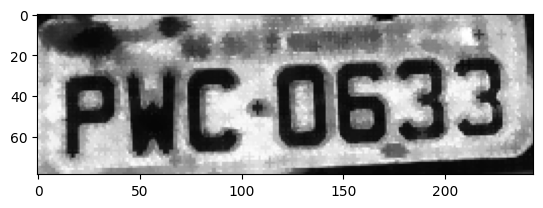

In [3]:
# Convertendo para escala de cinza
size = (5, 5)
cross = cv2.getStructuringElement(cv2.MORPH_CROSS,
                                  size)
img = MorphologicalClosing(cross).process(GrayScale().process(plate))

print(ocr.extract_text(img))
plt.imshow(img, cmap='gray')

PVC0633


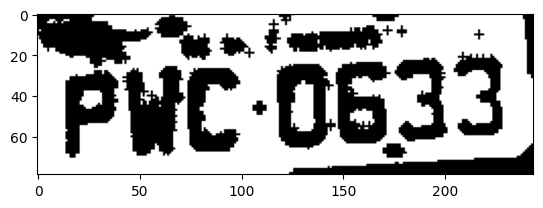

In [4]:
new_img = OtsuBinarizer().binarize(img)

print(ocr.extract_text(new_img))
plt.imshow(new_img, cmap='gray')

PWC0633


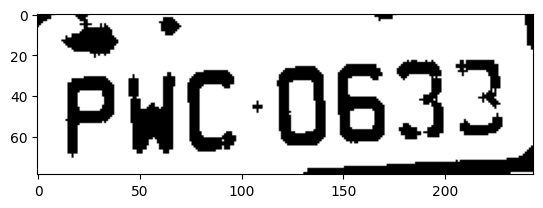

In [5]:
new_img = KittlerBinarizer().binarize(img)

print(ocr.extract_text(new_img))
plt.imshow(new_img, cmap='gray')

PIIC06B3


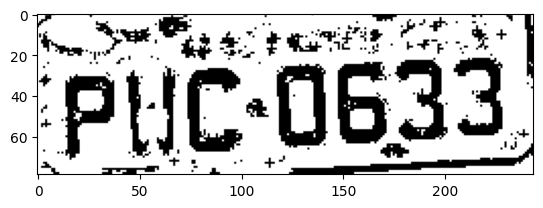

In [6]:
new_img = AdaptativeGaussianBinarizer(block_size=17, C=20).binarize(img)

print(ocr.extract_text(new_img))
plt.imshow(new_img, cmap='gray')

PIC0O3


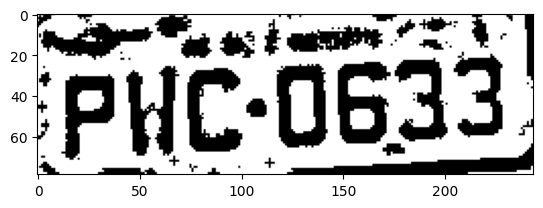

In [7]:
new_img = AdaptativeMeanBinarizer(block_size=17, C=20).binarize(img)

print(ocr.extract_text(new_img))
plt.imshow(new_img, cmap='gray')